<a href="https://colab.research.google.com/github/ryanlr-ops/Submit-Tutorials/blob/main/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1
## (Do not remove any comments that start with"# @@@".)

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math
*

How many years of data are logged in our dataset?

In [26]:
print(df['YEAR'].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [27]:
michigan_ohio_df = df[df['STATE'].isin(['MICHIGAN', 'OHIO'])]
average_scores = michigan_ohio_df.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
print(f"Average 'AVG_MATH_4_SCORE' for Michigan: {average_scores.get('MICHIGAN'):.2f}")
print(f"Average 'AVG_MATH_4_SCORE' for Ohio: {average_scores.get('OHIO'):.2f}")

Average 'AVG_MATH_4_SCORE' for Michigan: 232.95
Average 'AVG_MATH_4_SCORE' for Ohio: 237.36


Find the average for your chosen test across all states in 2019

In [28]:
df_2019 = df[df['YEAR'] == 2019]
average_math_score_2019 = df_2019['AVG_MATH_4_SCORE'].mean()
print(f"Average 'AVG_MATH_4_SCORE' across all states in 2019: {average_math_score_2019:.2f}")

Average 'AVG_MATH_4_SCORE' across all states in 2019: 239.94


For each state, find a maximum value for your chosen test score

In [29]:
max_scores_per_state = df.dropna(subset=['AVG_MATH_4_SCORE']).groupby('STATE')['AVG_MATH_4_SCORE'].max()
print("Maximum 'AVG_MATH_4_SCORE' for each state:")
print(max_scores_per_state)

Maximum 'AVG_MATH_4_SCORE' for each state:
STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE        

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [30]:
df['ENROLL'] = df['ENROLL'].fillna(0)
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

df['AVG_MATH_4_SCORE'] = df.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.interpolate()))
df['AVG_MATH_4_SCORE'] = df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].mean())

df['expenditure_per_student'] = df.groupby('STATE')['expenditure_per_student'].transform(lambda x: x.fillna(x.interpolate()))
df['expenditure_per_student'] = df['expenditure_per_student'].fillna(df['expenditure_per_student'].mean())

Feature engineering justification: **<I created expenditure_per_student by dividing TOTAL_EXPENDITURE by ENROLL (after filling NaN ENROLL with 0 to avoid division by zero). This new feature helps normalize expenditure across states, as larger states would naturally have higher total expenditures.>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

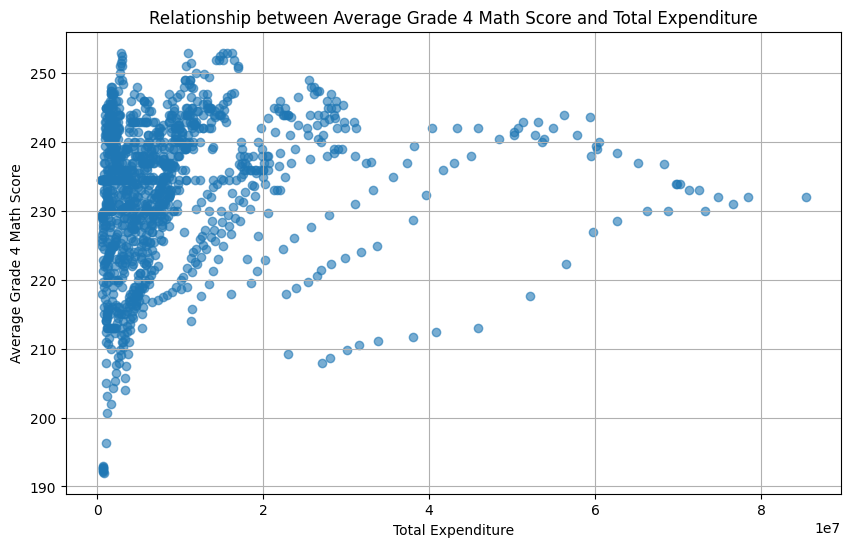

In [31]:
df_viz1 = df.dropna(subset=['AVG_MATH_4_SCORE', 'TOTAL_EXPENDITURE'])
plt.figure(figsize=(10, 6))
plt.scatter(df_viz1['TOTAL_EXPENDITURE'], df_viz1['AVG_MATH_4_SCORE'], alpha=0.6)
plt.title('Relationship between Average Grade 4 Math Score and Total Expenditure')
plt.xlabel('Total Expenditure')
plt.ylabel('Average Grade 4 Math Score')
plt.grid(True)
plt.show()

**<This scatter plot shows a positive relationship between total expenditure and average Grade 4 Math scores>**

**Visualization 2**

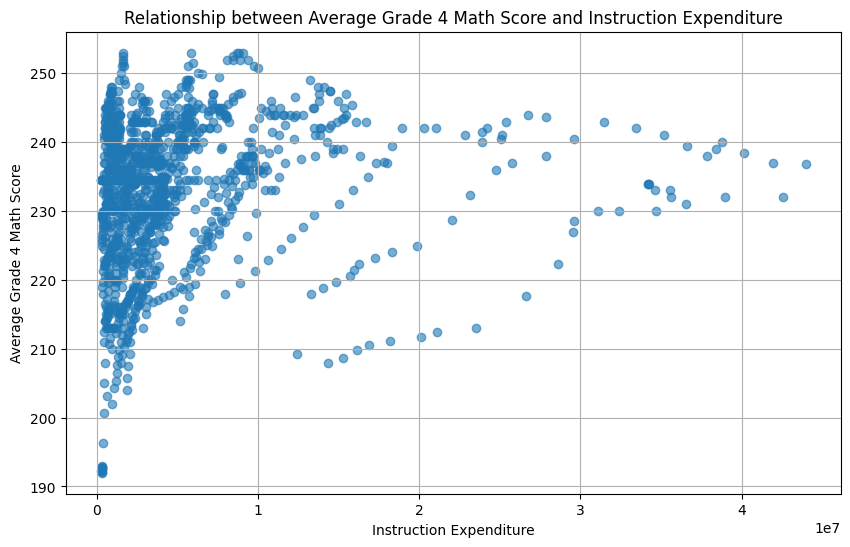

In [33]:
df_viz2 = df.dropna(subset=['AVG_MATH_4_SCORE', 'INSTRUCTION_EXPENDITURE'])
plt.figure(figsize=(10, 6))
plt.scatter(df_viz2['INSTRUCTION_EXPENDITURE'], df_viz2['AVG_MATH_4_SCORE'], alpha=0.6)
plt.title('Relationship between Average Grade 4 Math Score and Instruction Expenditure')
plt.xlabel('Instruction Expenditure')
plt.ylabel('Average Grade 4 Math Score')
plt.grid(True)
plt.show()

**<This scatter plot suggests a positive correlation between instruction expenditure and average Grade 4 Math scores.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X = df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'expenditure_per_student']]
y = df['AVG_MATH_4_SCORE']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [41]:
y_pred = model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

In [43]:
df['ENROLL'] = df['ENROLL'].fillna(0)

# Calculate expenditure_per_student. This can introduce inf values if ENROLL is 0.
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

# Handle missing values for TOTAL_EXPENDITURE
df['TOTAL_EXPENDITURE'] = df.groupby('STATE')['TOTAL_EXPENDITURE'].transform(lambda x: x.fillna(x.interpolate()))
df['TOTAL_EXPENDITURE'] = df['TOTAL_EXPENDITURE'].fillna(df['TOTAL_EXPENDITURE'].mean())

# Handle missing values for INSTRUCTION_EXPENDITURE
df['INSTRUCTION_EXPENDITURE'] = df.groupby('STATE')['INSTRUCTION_EXPENDITURE'].transform(lambda x: x.fillna(x.interpolate()))
df['INSTRUCTION_EXPENDITURE'] = df['INSTRUCTION_EXPENDITURE'].fillna(df['INSTRUCTION_EXPENDITURE'].mean())

# Handle missing values and infinite values for expenditure_per_student
df['expenditure_per_student'] = df.groupby('STATE')['expenditure_per_student'].transform(lambda x: x.fillna(x.interpolate()))
df['expenditure_per_student'] = df['expenditure_per_student'].replace([np.inf, -np.inf], np.nan) # Replace inf with NaN for easier handling
df['expenditure_per_student'] = df['expenditure_per_student'].fillna(df['expenditure_per_student'].mean())

# Handle missing values for AVG_MATH_4_SCORE
df['AVG_MATH_4_SCORE'] = df.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.interpolate()))
df['AVG_MATH_4_SCORE'] = df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].mean())

In [44]:
X = df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'expenditure_per_student']]
y = df['AVG_MATH_4_SCORE']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [51]:
from sklearn.metrics import r2_score
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"R-squared on training data: {r2_score(y_train, y_pred_train):.2f}")
print(f"R-squared on test data: {r2_score(y_test, y_pred_test):.2f}")

R-squared on training data: 0.25
R-squared on test data: 0.27


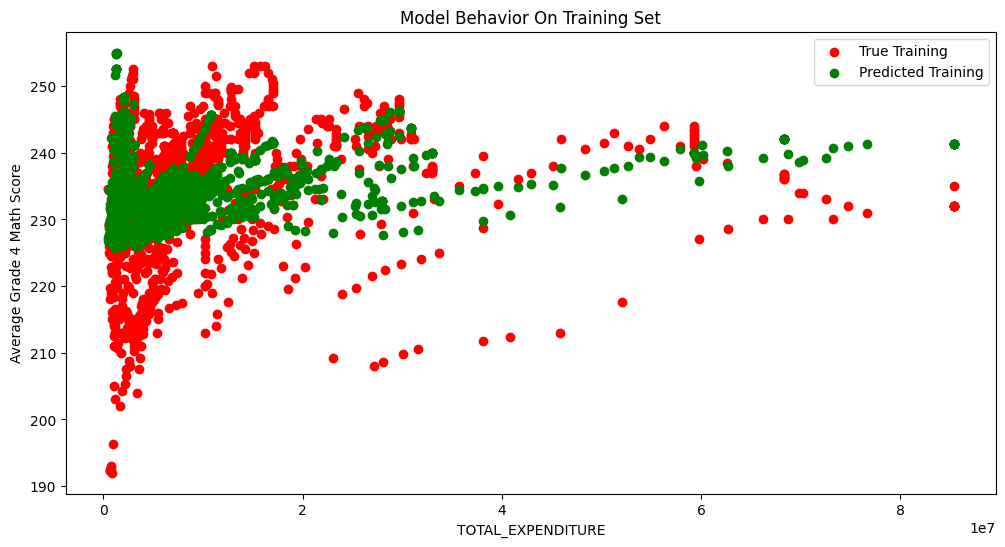

In [52]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Math Score')
plt.title("Model Behavior On Training Set")
plt.show()

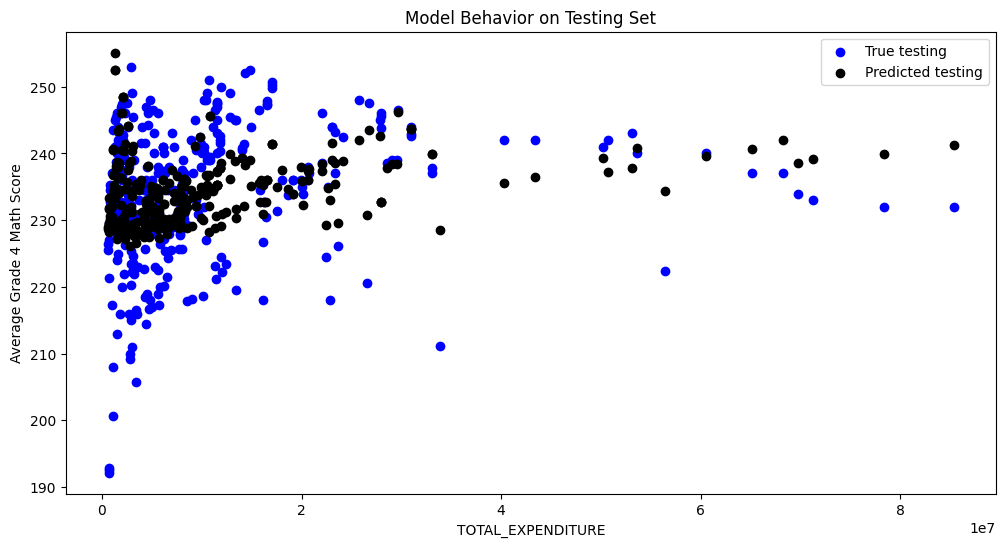

In [53]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Math Score')
plt.title("Model Behavior on Testing Set")
plt.show()

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("--- Training Set Metrics ---")
print(f"R-squared: {r2_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")

print("\n--- Testing Set Metrics ---")
print(f"R-squared: {r2_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")

--- Training Set Metrics ---
R-squared: 0.25
Mean Absolute Error (MAE): 6.24
Mean Squared Error (MSE): 71.56

--- Testing Set Metrics ---
R-squared: 0.27
Mean Absolute Error (MAE): 6.32
Mean Squared Error (MSE): 75.04


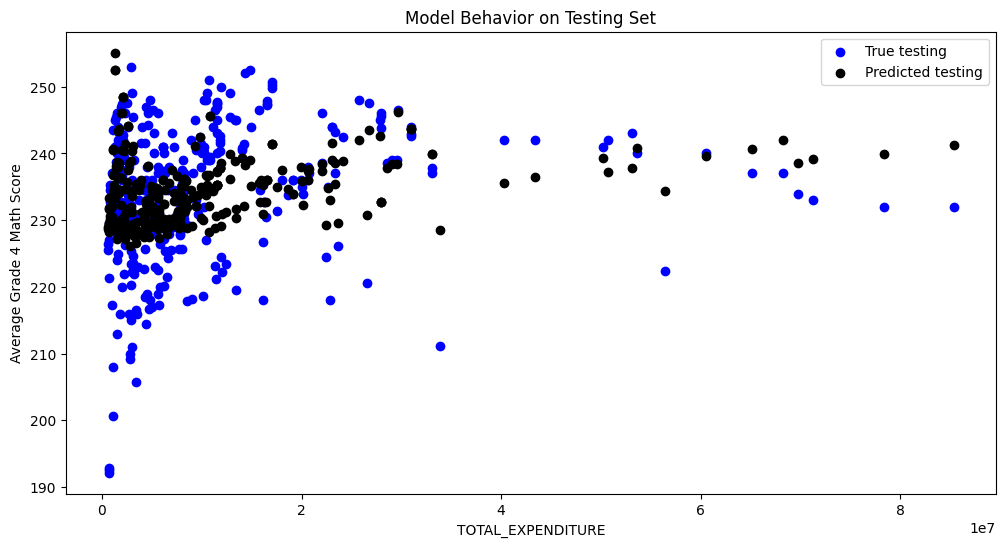

In [56]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Math Score')
plt.title("Model Behavior on Testing Set")
plt.show()